In [114]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [115]:
df = pd.read_csv('Hack_data_final.csv')
df.head()
type(df)

pandas.core.frame.DataFrame

In [116]:
df.describe()

,Open,High,Low,Close,Adj Close,GDP,Debt,dxy
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,75.581138,75.840071,75.334171,75.572994,75.572994,2.642927,578.326731,97.412989
std,2.837066,2.882981,2.842188,2.844046,2.844046,0.200195,32.345038,5.992782
min,70.718903,70.952499,70.606499,70.718002,70.718002,2.237000,516.320000,89.840000
25%,73.702202,73.870503,73.443902,73.675647,73.675647,2.536000,551.565000,92.630000
50%,74.796997,75.006302,74.540298,74.794998,74.794998,2.724000,589.470000,95.990000
75%,76.495098,76.835651,76.111748,76.469749,76.469749,2.800000,605.350000,100.400000
max,82.997002,83.386002,82.740997,82.997002,82.997002,2.897000,624.460000,112.120000


In [117]:
df.drop(['Open','High','Low','Adj Close'],axis=1,inplace=True)
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True,dayfirst=True)
df.tail(3)

,Date,Close,GDP,Debt,dxy
780,2022-12-28,82.776100,2.897,624.46,103.52
781,2022-12-29,82.851997,2.897,624.46,103.52
782,2022-12-30,82.835098,2.897,624.46,103.52


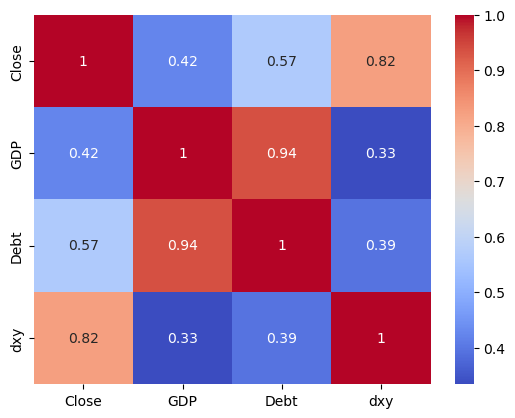

In [118]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

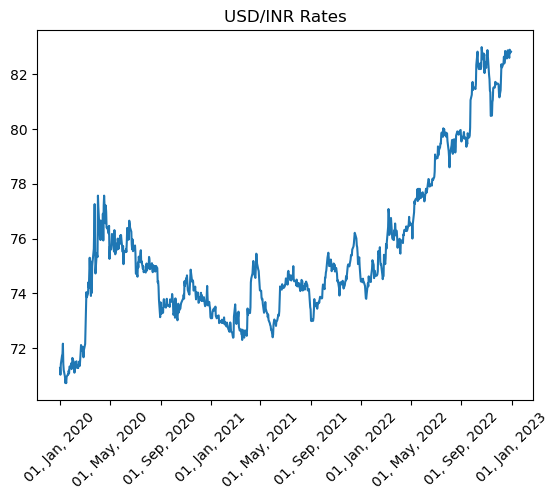

In [119]:

import matplotlib.dates as mpl_dates
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])
date_format = mpl_dates.DateFormatter('%d, %b, %Y')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.title('USD/INR Rates')

plt.show()


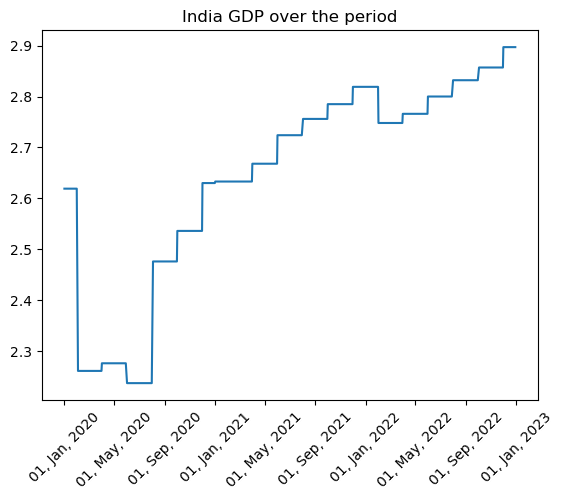

In [120]:
fig, ax = plt.subplots()
ax.plot(df['Date'], df['GDP'])
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.title('India GDP over the period' )
plt.show()



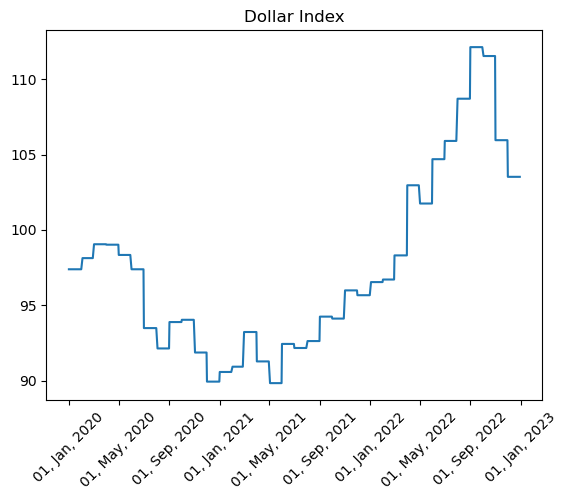

In [121]:
fig, ax = plt.subplots()
ax.plot(df['Date'], df['dxy'])
# Set the x-axis format
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.title('Dollar Index')
plt.show()

In [122]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(f'Training set size: {len(train_df)}')
print(f'Test set size: {len(test_df)}')

Training set size: 626
Test set size: 157


In [123]:
input_cols=['GDP','Debt','dxy']
target_cols=['Close']


In [124]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df[input_cols])

In [126]:
train_inputs[input_cols] = scaler.transform(train_inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

In [127]:
train_inputs
test_inputs

,GDP,Debt,dxy
597,0.801515,0.777788,0.588869
589,0.801515,0.777788,0.588869
208,0.453030,0.374977,0.188510
291,0.600000,0.547346,0.048923
174,0.362121,0.276863,0.181777
...,...,...,...
79,0.059091,0.087942,0.412029
148,0.000000,0.153782,0.163824
334,0.653030,0.597559,0.064632
204,0.453030,0.374977,0.188510


In [128]:
len(df)

783

In [129]:
#!pip install xgboost
from xgboost import XGBRegressor
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)


In [130]:
model.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [131]:
train_predict = model.predict(train_inputs)
test_predict=model.predict(test_inputs)


In [132]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=True)

In [133]:
rmse(preds, test_targets)
print(f'gradient boost RMSE== {rmse(preds,test_targets)}')

gradient boost RMSE== 0.2390421777588021


In [147]:

next_day_data = pd.DataFrame({'GDP': [2.897], 'Debt': [624.46], 'dxy': [104.527]})
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df[input_cols])
next_day_data=scaler.transform(next_day_data)
print(next_day_data)


model.predict(next_day_data)


[[1.         1.         0.65920108]]


array([81.8784], dtype=float32)

In [137]:
import os

cwd = os.getcwd()
pickle_file = os.path.join(cwd, 'my_pickled_notebook.pkl')

print("Pickled file saved to:", pickle_file)


Pickled file saved to: C:\Users\ameya\my_pickled_notebook.pkl
